# **Muhammad Rifal Alfarizy | 201710370311219**
# **Afwun Shiddiq M |         201710370311235**

# Library

In [ ]:
import re
import string
import requests
import numpy as np
import pandas as pd
import nltk
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer

# Install Sastrawi dan NLTK

In [ ]:
pip install Sastrawi

     |████████████████████████████████| 215kB 8.8MB/s 


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Crawling Data

In [ ]:
r = requests.get('https://www.cnnindonesia.com/olahraga')
soup = BeautifulSoup(r.content, 'html.parser')

In [ ]:
r2 = requests.get('https://www.cnnindonesia.com/teknologi')
soup2 = BeautifulSoup(r2.content, 'html.parser')

In [ ]:
print(soup)

<!DOCTYPE html>

<html lang="id-ID">
<head>
<title>CNN Indonesia | Berita Terkini Olahraga</title>
<link href="https://cnnindonesia.com" rel="dns-prefetch"/>
<link href="https://cdn.cnnindonesia.com" rel="dns-prefetch"/>
<link href="https://cdn.detik.net.id" rel="dns-prefetch"/>
<link href="https://securepubads.g.doubleclick.net" rel="dns-prefetch"/>
<link href="https://cdnstatic.detik.com" rel="dns-prefetch"/>
<link href="https://akcdn.detik.net.id" rel="dns-prefetch"/>
<link href="https://www.gstatic.com" rel="dns-prefetch"/>
<link href="https://www.google-analytics.com" rel="dns-prefetch"/>
<link href="https://www.facebook.com" rel="dns-prefetch"/>
<link href="https://partner.googleadservices.com" rel="dns-prefetch"/>
<link href="https://connect.facebook.net" rel="dns-prefetch"/>
<link href="https://connect.detik.com" rel="dns-prefetch"/>
<link href="https://www.googletagmanager.com" rel="dns-prefetch"/>
<link href="https://t.pubmatic.com" rel="dns-prefetch"/>
<link href="https://ad

In [ ]:
link = []
for i in soup.find('div', {'class':'list media_rows lined'}).find_all('a'):
    i['href'] = i['href'] + '?page=all'
    link.append(i['href'])

In [ ]:
link2 = []
for i in soup2.find('div', {'class':'list media_rows lined'}).find_all('a'):
    i['href'] = i['href'] + '?page=all'
    link2.append(i['href'])

In [ ]:
link2

['https://www.cnnindonesia.com/teknologi/20210114164611-192-593820/party-bareng-raffi-netizen-cibir-ahok-ungkit-rizieq-shihab?page=all',
 'https://www.cnnindonesia.com/teknologi/20210114173717-199-593864/jauh-terbang-dari-as-merpati-terancam-dibunuh-di-australia?page=all',
 'https://www.cnnindonesia.com/teknologi/20210114161948-199-593813/lukisan-gua-tertua-dunia-ada-di-ri-tanda-kecerdasan-budaya?page=all',
 'https://www.cnnindonesia.com/teknologi/20210114141136-199-593739/ribka-sebut-vaksin-bikin-lumpuh-dan-mati-ahli-angkat-bicara?page=all',
 'https://www.cnnindonesia.com/teknologi/20210114161130-384-593805/belum-ada-sinyal-honda-pcx160-mau-dijual-di-indonesia?page=all']

In [ ]:
link

['https://www.cnnindonesia.com/olahraga/20210114191939-170-593914/hasil-yonex-thailand-open-leo-daniel-kalahkan-fajar-rian?page=all',
 'https://www.cnnindonesia.com/olahraga/20210114200727-170-593928/6-wakil-indonesia-di-perempat-final-yonex-thailand-open-2021?page=all',
 'https://www.cnnindonesia.com/olahraga/20210114173319-142-593851/syahrian-abimanyu-dipinjamkan-jdt-ke-newcastle?page=all',
 'https://www.cnnindonesia.com/olahraga/20210114183837-170-593881/hasil-yonex-thailand-open-shesar-dikalahkan-chou-tien-chen?page=all',
 'https://www.cnnindonesia.com/olahraga/20210114165555-170-593829/hasil-yonex-thailand-open-greysia-apriyani-ke-perempat-final?page=all']

In [ ]:
link3 = link+link2
link3

['https://www.cnnindonesia.com/olahraga/20210114191939-170-593914/hasil-yonex-thailand-open-leo-daniel-kalahkan-fajar-rian?page=all',
 'https://www.cnnindonesia.com/olahraga/20210114200727-170-593928/6-wakil-indonesia-di-perempat-final-yonex-thailand-open-2021?page=all',
 'https://www.cnnindonesia.com/olahraga/20210114173319-142-593851/syahrian-abimanyu-dipinjamkan-jdt-ke-newcastle?page=all',
 'https://www.cnnindonesia.com/olahraga/20210114183837-170-593881/hasil-yonex-thailand-open-shesar-dikalahkan-chou-tien-chen?page=all',
 'https://www.cnnindonesia.com/olahraga/20210114165555-170-593829/hasil-yonex-thailand-open-greysia-apriyani-ke-perempat-final?page=all',
 'https://www.cnnindonesia.com/teknologi/20210114164611-192-593820/party-bareng-raffi-netizen-cibir-ahok-ungkit-rizieq-shihab?page=all',
 'https://www.cnnindonesia.com/teknologi/20210114173717-199-593864/jauh-terbang-dari-as-merpati-terancam-dibunuh-di-australia?page=all',
 'https://www.cnnindonesia.com/teknologi/20210114161948-

In [ ]:
print(link[0])

https://www.cnnindonesia.com/olahraga/20210114191939-170-593914/hasil-yonex-thailand-open-leo-daniel-kalahkan-fajar-rian?page=all


In [ ]:
documents = []
for i in link:
    r = requests.get(i)
    soup = BeautifulSoup(r.content, 'html.parser')

    sen = []
    for i in soup.find('div', {'detail_wrap'}).find_all('p'):
        sen.append(i.text)
    documents.append(' '.join(sen))

for i in link2:
    r = requests.get(i)
    soup = BeautifulSoup(r.content, 'html.parser')

    sen = []
    for i in soup.find('div', {'detail_wrap'}).find_all('p'):
        sen.append(i.text)
    documents.append(' '.join(sen))

In [ ]:
print(len(documents))

10


# Preprocessing

## Case Folding

In [ ]:
# proses preprocessing
documents_clean = []
for d in documents:

#CASE FOLDING
  # Remove Unicode
  document_test = re.sub(r'[^\x00-\x7F]+', ' ', d)
  # Remove Mentions
  document_test = re.sub(r'@\w+', '', document_test)
  # Remove punctuations
  document_test = re.sub(r'[%s]' % re.escape(string.punctuation), ' ', document_test)
  # Lowercase the numbers
  document_test = re.sub(r'[0-9]', '', document_test)
  # Remove the doubled space
  document_test = re.sub(r'\s{2,}', ' ', document_test)

  # Lowercase the document
  document_test = document_test.lower()

  documents_clean.append(document_test)

In [ ]:
print(documents_clean)

['leo rolly carnando daniel marthin mengalahkan fajar alfian muhammad rian ardianto dan pada babak besar yonex thailand open fajar rian dan leo daniel sempat bersaing ketat pada awal laga selepas skor imbang fajar rian melesat meninggalkan lawannya yang merupakan sesama penghuni pelatnas pbsi pasangan peringkat enam dunia itu unggul tujuh poin dan skor menandai interval gim pertama selepas jeda leo daniel mencoba memangkas jarak namun fajar rian tidak lengah sempat ditahan di poin fajar rian kemudian kembali meraih poin dan menjauh hingga menutup gim pertama dengan kemenangan pada gim kedua leo daniel melesat dengan keunggulan perolehan poin juara dunia junior itu sempat tersendat sementara fajar rian memperkecil jarak leo daniel kembali merai poin beruntun setelah hampir disamakan fajar rian ganda putra peringkat dunia itu unggul leo daniel sempat meninggalkan fajar rian pada poin upaya fajar rian mengejar leo daniel terus berlanjut hingga mendekati poin krusial leo daniel tak goyah d

## Tokenizing

In [ ]:
d1 = []
d2 = []
d3 = []
d4 = []
d5 = []
d6 = []
d7 = []
d8 = []
d9 = []
d10 = []

for i in range(len(documents_clean)):
  if(i==0):
    d1 = documents_clean[i]
  elif(i==1):
    d2 = documents_clean[i]
  elif(i==2):
    d3 = documents_clean[i]
  elif(i==3):
    d4 = documents_clean[i]
  elif(i==4):
    d5 = documents_clean[i]
  elif(i==5):
    d6 = documents_clean[i]
  elif(i==6):
    d7 = documents_clean[i]
  elif(i==7):
    d8 = documents_clean[i]
  elif(i==8):
    d9 = documents_clean[i]
  elif(i==9):
    d10 = documents_clean[i]

print(d1)

leo rolly carnando daniel marthin mengalahkan fajar alfian muhammad rian ardianto dan pada babak besar yonex thailand open fajar rian dan leo daniel sempat bersaing ketat pada awal laga selepas skor imbang fajar rian melesat meninggalkan lawannya yang merupakan sesama penghuni pelatnas pbsi pasangan peringkat enam dunia itu unggul tujuh poin dan skor menandai interval gim pertama selepas jeda leo daniel mencoba memangkas jarak namun fajar rian tidak lengah sempat ditahan di poin fajar rian kemudian kembali meraih poin dan menjauh hingga menutup gim pertama dengan kemenangan pada gim kedua leo daniel melesat dengan keunggulan perolehan poin juara dunia junior itu sempat tersendat sementara fajar rian memperkecil jarak leo daniel kembali merai poin beruntun setelah hampir disamakan fajar rian ganda putra peringkat dunia itu unggul leo daniel sempat meninggalkan fajar rian pada poin upaya fajar rian mengejar leo daniel terus berlanjut hingga mendekati poin krusial leo daniel tak goyah dan

In [ ]:
for i in range(len(documents_clean)):
  kata1 = nltk.tokenize.word_tokenize(d1)
  kata2 = nltk.tokenize.word_tokenize(d2)
  kata3 = nltk.tokenize.word_tokenize(d3)
  kata4 = nltk.tokenize.word_tokenize(d4)
  kata5 = nltk.tokenize.word_tokenize(d5)
  kata6 = nltk.tokenize.word_tokenize(d6)
  kata7 = nltk.tokenize.word_tokenize(d7)
  kata8 = nltk.tokenize.word_tokenize(d8)
  kata9 = nltk.tokenize.word_tokenize(d9)
  kata10 = nltk.tokenize.word_tokenize(d10)

print("Banyaknya Kata = ",len(kata1))
print(kata1)

Banyaknya Kata =  285
['leo', 'rolly', 'carnando', 'daniel', 'marthin', 'mengalahkan', 'fajar', 'alfian', 'muhammad', 'rian', 'ardianto', 'dan', 'pada', 'babak', 'besar', 'yonex', 'thailand', 'open', 'fajar', 'rian', 'dan', 'leo', 'daniel', 'sempat', 'bersaing', 'ketat', 'pada', 'awal', 'laga', 'selepas', 'skor', 'imbang', 'fajar', 'rian', 'melesat', 'meninggalkan', 'lawannya', 'yang', 'merupakan', 'sesama', 'penghuni', 'pelatnas', 'pbsi', 'pasangan', 'peringkat', 'enam', 'dunia', 'itu', 'unggul', 'tujuh', 'poin', 'dan', 'skor', 'menandai', 'interval', 'gim', 'pertama', 'selepas', 'jeda', 'leo', 'daniel', 'mencoba', 'memangkas', 'jarak', 'namun', 'fajar', 'rian', 'tidak', 'lengah', 'sempat', 'ditahan', 'di', 'poin', 'fajar', 'rian', 'kemudian', 'kembali', 'meraih', 'poin', 'dan', 'menjauh', 'hingga', 'menutup', 'gim', 'pertama', 'dengan', 'kemenangan', 'pada', 'gim', 'kedua', 'leo', 'daniel', 'melesat', 'dengan', 'keunggulan', 'perolehan', 'poin', 'juara', 'dunia', 'junior', 'itu', 'se

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

kemunculan1 = nltk.FreqDist(kata1)
kemunculan2 = nltk.FreqDist(kata2)
kemunculan3 = nltk.FreqDist(kata3)
kemunculan4 = nltk.FreqDist(kata4)
kemunculan5 = nltk.FreqDist(kata5)
kemunculan6 = nltk.FreqDist(kata6)
kemunculan7 = nltk.FreqDist(kata7)
kemunculan8 = nltk.FreqDist(kata8)
kemunculan9 = nltk.FreqDist(kata9)
kemunculan10 = nltk.FreqDist(kata10)
print(kemunculan1.most_common())

[('daniel', 14), ('leo', 13), ('fajar', 12), ('rian', 12), ('poin', 10), ('dan', 7), ('yang', 7), ('pada', 6), ('sempat', 6), ('unggul', 5), ('gim', 5), ('kedua', 4), ('ganda', 4), ('putra', 4), ('laga', 3), ('pasangan', 3), ('dunia', 3), ('itu', 3), ('hingga', 3), ('dengan', 3), ('kemenangan', 3), ('setelah', 3), ('mengalahkan', 2), ('ketat', 2), ('awal', 2), ('selepas', 2), ('skor', 2), ('melesat', 2), ('meninggalkan', 2), ('peringkat', 2), ('pertama', 2), ('jarak', 2), ('namun', 2), ('tidak', 2), ('kemudian', 2), ('kembali', 2), ('meraih', 2), ('perolehan', 2), ('beruntun', 2), ('berlangsung', 2), ('dua', 2), ('kesempatan', 2), ('asal', 2), ('rolly', 1), ('carnando', 1), ('marthin', 1), ('alfian', 1), ('muhammad', 1), ('ardianto', 1), ('babak', 1), ('besar', 1), ('yonex', 1), ('thailand', 1), ('open', 1), ('bersaing', 1), ('imbang', 1), ('lawannya', 1), ('merupakan', 1), ('sesama', 1), ('penghuni', 1), ('pelatnas', 1), ('pbsi', 1), ('enam', 1), ('tujuh', 1), ('menandai', 1), ('inter

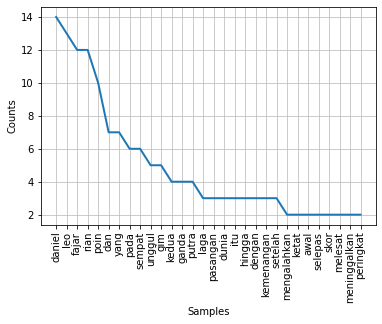

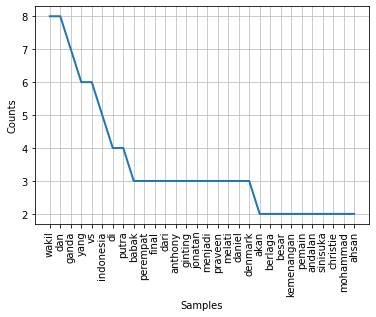

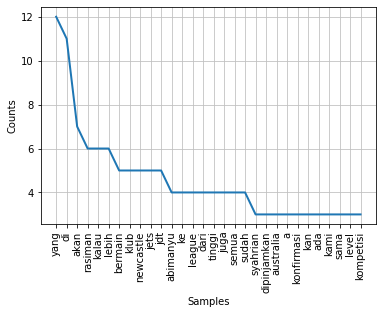

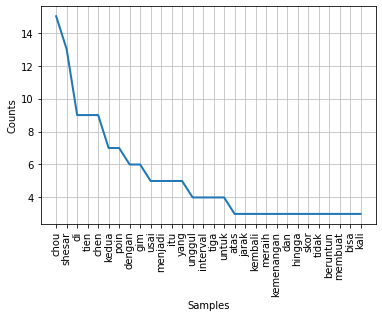

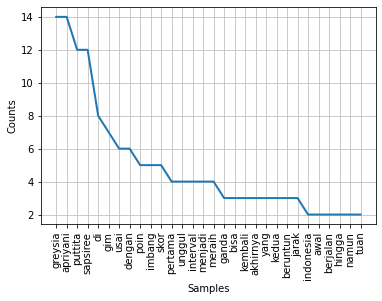

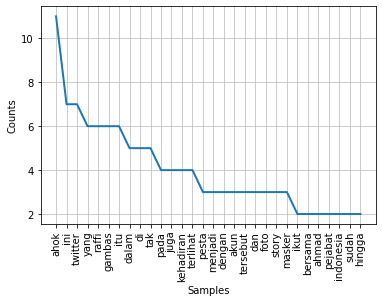

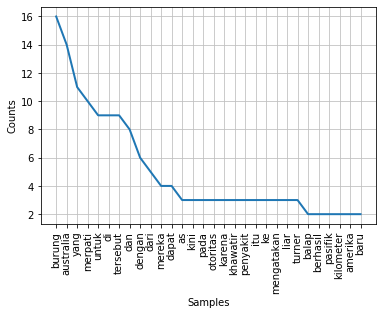

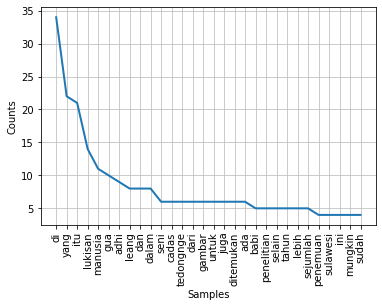

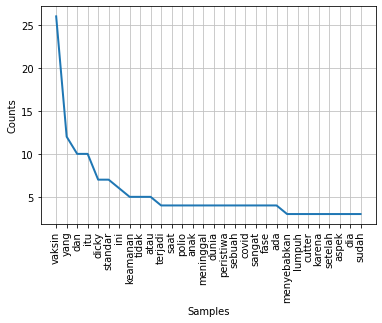

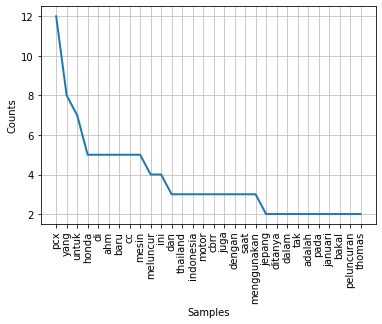

In [ ]:
import matplotlib.pyplot as plt
kemunculan1.plot(30,cumulative=False)
kemunculan2.plot(30,cumulative=False)
kemunculan3.plot(30,cumulative=False)
kemunculan4.plot(30,cumulative=False)
kemunculan5.plot(30,cumulative=False)
kemunculan6.plot(30,cumulative=False)
kemunculan7.plot(30,cumulative=False)
kemunculan8.plot(30,cumulative=False)
kemunculan9.plot(30,cumulative=False)
kemunculan10.plot(30,cumulative=False)
plt.show()

## Filtering (Stopword Removal)

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
 
listStopword =  set(stopwords.words('indonesian'))
 
removed1 = []
for t in kata1:
    if t not in listStopword:
        removed1.append(t)

removed2 = []
for t in kata2:
    if t not in listStopword:
        removed2.append(t)

removed3 = []
for t in kata3:
    if t not in listStopword:
        removed3.append(t)

removed4 = []
for t in kata4:
    if t not in listStopword:
        removed4.append(t)

removed5 = []
for t in kata5:
    if t not in listStopword:
        removed5.append(t)

removed6 = []
for t in kata6:
    if t not in listStopword:
        removed6.append(t)

removed7 = []
for t in kata7:
    if t not in listStopword:
        removed7.append(t)

removed8 = []
for t in kata8:
    if t not in listStopword:
        removed8.append(t)

removed9 = []
for t in kata9:
    if t not in listStopword:
        removed9.append(t)

removed10 = []
for t in kata10:
    if t not in listStopword:
        removed10.append(t)
 
print(removed1)

['leo', 'rolly', 'carnando', 'daniel', 'marthin', 'mengalahkan', 'fajar', 'alfian', 'muhammad', 'rian', 'ardianto', 'babak', 'yonex', 'thailand', 'open', 'fajar', 'rian', 'leo', 'daniel', 'bersaing', 'ketat', 'laga', 'selepas', 'skor', 'imbang', 'fajar', 'rian', 'melesat', 'meninggalkan', 'lawannya', 'penghuni', 'pelatnas', 'pbsi', 'pasangan', 'peringkat', 'enam', 'dunia', 'unggul', 'tujuh', 'poin', 'skor', 'menandai', 'interval', 'gim', 'selepas', 'jeda', 'leo', 'daniel', 'mencoba', 'memangkas', 'jarak', 'fajar', 'rian', 'lengah', 'ditahan', 'poin', 'fajar', 'rian', 'meraih', 'poin', 'menjauh', 'menutup', 'gim', 'kemenangan', 'gim', 'leo', 'daniel', 'melesat', 'keunggulan', 'perolehan', 'poin', 'juara', 'dunia', 'junior', 'tersendat', 'fajar', 'rian', 'memperkecil', 'jarak', 'leo', 'daniel', 'merai', 'poin', 'beruntun', 'disamakan', 'fajar', 'rian', 'ganda', 'putra', 'peringkat', 'dunia', 'unggul', 'leo', 'daniel', 'meninggalkan', 'fajar', 'rian', 'poin', 'upaya', 'fajar', 'rian', 'me

In [ ]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
print(stopwords)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

## Stemming

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

dokumen1 = []
for i in removed1:
  kata_steming = stemmer.stem(i)
  dokumen1.append(kata_steming)

dokumen2 = []
for i in removed2:
  kata_steming = stemmer.stem(i)
  dokumen2.append(kata_steming)

dokumen3 = []
for i in removed3:
  kata_steming = stemmer.stem(i)
  dokumen3.append(kata_steming)

dokumen4 = []
for i in removed4:
  kata_steming = stemmer.stem(i)
  dokumen4.append(kata_steming)

dokumen5 = []
for i in removed5:
  kata_steming = stemmer.stem(i)
  dokumen5.append(kata_steming)

dokumen6 = []
for i in removed6:
  kata_steming = stemmer.stem(i)
  dokumen6.append(kata_steming)

dokumen7 = []
for i in removed7:
  kata_steming = stemmer.stem(i)
  dokumen7.append(kata_steming)

dokumen8 = []
for i in removed8:
  kata_steming = stemmer.stem(i)
  dokumen8.append(kata_steming)

dokumen9 = []
for i in removed9:
  kata_steming = stemmer.stem(i)
  dokumen9.append(kata_steming)

dokumen10 = []
for i in removed10:
  kata_steming = stemmer.stem(i)
  dokumen10.append(kata_steming)

print(dokumen1)
# ouput
# andi kerap laku transaksi rutin cara daring atau online turut andi belanja online lebih praktis murah

['leo', 'rolly', 'carnando', 'daniel', 'marthin', 'kalah', 'fajar', 'alfian', 'muhammad', 'rian', 'ardianto', 'babak', 'yonex', 'thailand', 'open', 'fajar', 'rian', 'leo', 'daniel', 'saing', 'ketat', 'laga', 'lepas', 'skor', 'imbang', 'fajar', 'rian', 'lesat', 'tinggal', 'lawan', 'huni', 'pelatnas', 'pbsi', 'pasang', 'peringkat', 'enam', 'dunia', 'unggul', 'tujuh', 'poin', 'skor', 'tanda', 'interval', 'gim', 'lepas', 'jeda', 'leo', 'daniel', 'coba', 'mangkas', 'jarak', 'fajar', 'rian', 'lengah', 'tahan', 'poin', 'fajar', 'rian', 'raih', 'poin', 'jauh', 'tutup', 'gim', 'menang', 'gim', 'leo', 'daniel', 'lesat', 'unggul', 'oleh', 'poin', 'juara', 'dunia', 'junior', 'sendat', 'fajar', 'rian', 'kecil', 'jarak', 'leo', 'daniel', 'rai', 'poin', 'untun', 'sama', 'fajar', 'rian', 'ganda', 'putra', 'peringkat', 'dunia', 'unggul', 'leo', 'daniel', 'tinggal', 'fajar', 'rian', 'poin', 'upaya', 'fajar', 'rian', 'kejar', 'leo', 'daniel', 'lanjut', 'dekat', 'poin', 'krusial', 'leo', 'daniel', 'goyah'

## Hasil Akhir Preprocessing

In [ ]:
def convert_list_to_string(nama_list, seperator=' '):
    """ Convert list to string, by joining all item in list with given separator.
        Returns the concatenated string """
    return seperator.join(nama_list)

dok1 = convert_list_to_string(dokumen1)
dok2 = convert_list_to_string(dokumen2)
dok3 = convert_list_to_string(dokumen3)
dok4 = convert_list_to_string(dokumen4)
dok5 = convert_list_to_string(dokumen5)
dok6 = convert_list_to_string(dokumen6)
dok7 = convert_list_to_string(dokumen7)
dok8 = convert_list_to_string(dokumen8)
dok9 = convert_list_to_string(dokumen9)
dok10 = convert_list_to_string(dokumen10)

d1 = []
d2 = []
d3 = []
d4 = []
d5 = []
d6 = []
d7 = []
d8 = []
d9 = []
d10 = []

d1.append(dok1)
d2.append(dok2)
d3.append(dok3)
d4.append(dok4)
d5.append(dok5)
d6.append(dok6)
d7.append(dok7)
d8.append(dok8)
d9.append(dok9)
d10.append(dok10)

In [ ]:
hasil_akhir = d1 + d2 + d3 + d4 + d5 + d6 + d7 + d8 + d9 + d10

In [ ]:
print(hasil_akhir)
print(len(hasil_akhir))

['leo rolly carnando daniel marthin kalah fajar alfian muhammad rian ardianto babak yonex thailand open fajar rian leo daniel saing ketat laga lepas skor imbang fajar rian lesat tinggal lawan huni pelatnas pbsi pasang peringkat enam dunia unggul tujuh poin skor tanda interval gim lepas jeda leo daniel coba mangkas jarak fajar rian lengah tahan poin fajar rian raih poin jauh tutup gim menang gim leo daniel lesat unggul oleh poin juara dunia junior sendat fajar rian kecil jarak leo daniel rai poin untun sama fajar rian ganda putra peringkat dunia unggul leo daniel tinggal fajar rian poin upaya fajar rian kejar leo daniel lanjut dekat poin krusial leo daniel goyah tampil konsisten emas menang gambas video cnn buru poin gim tiga ketat banding gim fajar rian unggul salip leo daniel raih poin untun fajar rian sama duduk laga alot pasang silih ganti pimpin oleh poin leo daniel unggul kali match point gagal fajar rian sempat unggul leo daniel sia nyiakan sempat menang leo daniel hadap menang l

# Search Engine

In [ ]:
docs = hasil_akhir
# Create Term-Document Matrix with TF-IDF weighting
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(docs)

# Create a DataFrame
df = pd.DataFrame(X.T.toarray(), index=vectorizer.get_feature_names())
df.head(100)

,0,1,2,3,4,5,6,7,8,9
abi,0.0,0.0,0.105336,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
abimanyu,0.0,0.0,0.210671,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
aborigin,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.029114,0.0,0.0
acara,0.0,0.0,0.000000,0.0,0.0,0.093964,0.000000,0.000000,0.0,0.0
adhi,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.262030,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
binatang,0.0,0.0,0.000000,0.0,0.0,0.000000,0.036445,0.000000,0.0,0.0
bincang,0.0,0.0,0.000000,0.0,0.0,0.046982,0.000000,0.000000,0.0,0.0
bintang,0.0,0.0,0.000000,0.0,0.0,0.000000,0.036445,0.000000,0.0,0.0
biosekuriti,0.0,0.0,0.000000,0.0,0.0,0.000000,0.036445,0.000000,0.0,0.0


In [ ]:
def get_similar_articles(q, df):
  print("query:", q)
  print("Berikut artikel dengan nilai cosine similarity tertinggi: ")
  print("")
  print("")
  print("")
  q = [q]
  q_vec = vectorizer.transform(q).toarray().reshape(df.shape[0],)
  sim = {}
  for i in range(len(hasil_akhir)):
    sim[i] = np.dot(df.loc[:, i].values, q_vec) / np.linalg.norm(df.loc[:, i]) * np.linalg.norm(q_vec)
  
  sim_sorted = sorted(sim.items(), key=lambda x: x[1], reverse=True)
  
  for k, v in sim_sorted:
    if v != 0.0:
      print("Nilai Similaritas:", v)
      print("Link : ",link3[k])
      print()


q1 = 'vaksin indonesia'

get_similar_articles(q1, df)
print('-'*100)

query: vaksin indonesia
Berikut artikel dengan nilai cosine similarity tertinggi: 



Nilai Similaritas: 0.7261732647756751
Link :  https://www.cnnindonesia.com/teknologi/20210114141136-199-593739/ribka-sebut-vaksin-bikin-lumpuh-dan-mati-ahli-angkat-bicara?page=all

Nilai Similaritas: 0.04680258844964068
Link :  https://www.cnnindonesia.com/olahraga/20210114200727-170-593928/6-wakil-indonesia-di-perempat-final-yonex-thailand-open-2021?page=all

Nilai Similaritas: 0.025897171651738164
Link :  https://www.cnnindonesia.com/teknologi/20210114161130-384-593805/belum-ada-sinyal-honda-pcx160-mau-dijual-di-indonesia?page=all

Nilai Similaritas: 0.016923834825698855
Link :  https://www.cnnindonesia.com/teknologi/20210114164611-192-593820/party-bareng-raffi-netizen-cibir-ahok-ungkit-rizieq-shihab?page=all

Nilai Similaritas: 0.01482889995952737
Link :  https://www.cnnindonesia.com/olahraga/20210114183837-170-593881/hasil-yonex-thailand-open-shesar-dikalahkan-chou-tien-chen?page=all

Nilai Simila